## Dataset analysis

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('data/us-patent-phrase-to-phrase-matching/train.csv')

In [52]:
df

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00
...,...,...,...,...,...
36468,8e1386cbefd7f245,wood article,wooden article,B44,1.00
36469,42d9e032d1cd3242,wood article,wooden box,B44,0.50
36470,208654ccb9e14fa3,wood article,wooden handle,B44,0.50
36471,756ec035e694722b,wood article,wooden material,B44,0.75


Statistics on number of anchor

In [83]:
df_anchor = df.groupby('anchor')['context'].count()

In [110]:
tmp = df_anchor.to_dict()
data = dict(sorted(tmp.items(), key=lambda item: item[1], reverse=True))

In [111]:
data

{'component composite coating': 152,
 'sheet supply roller': 150,
 'source voltage': 140,
 'perfluoroalkyl group': 136,
 'el display': 135,
 'average pore size': 133,
 'speed control means': 130,
 'parallel orientation': 127,
 'displacement mechanism': 124,
 'cathode layer': 118,
 'flow openings': 117,
 'electromagnetic radiation source': 115,
 'overall weight': 114,
 'central flow path': 111,
 'dimensional location': 109,
 'elastic assembly': 109,
 'conductor particles': 108,
 'hydrocarbyl substituted succinic': 108,
 'oxidizing enzyme': 107,
 'stabilizer members': 107,
 'nvm array': 106,
 'opposing walls': 105,
 'imaging axis': 104,
 'fluid flow source': 102,
 'produce liquid hydrocarbons': 102,
 'dual clutch': 101,
 'equipment unit': 101,
 'radio wave transmission': 101,
 'brake arms': 100,
 'coupling arms': 100,
 'materially less': 100,
 'pen based computer': 100,
 'smooth outer surface': 99,
 'return structure': 98,
 'component control': 97,
 'feed control valve': 97,
 'source cha

Text(0.5, 1.0, "Distribution of anchor's context ")

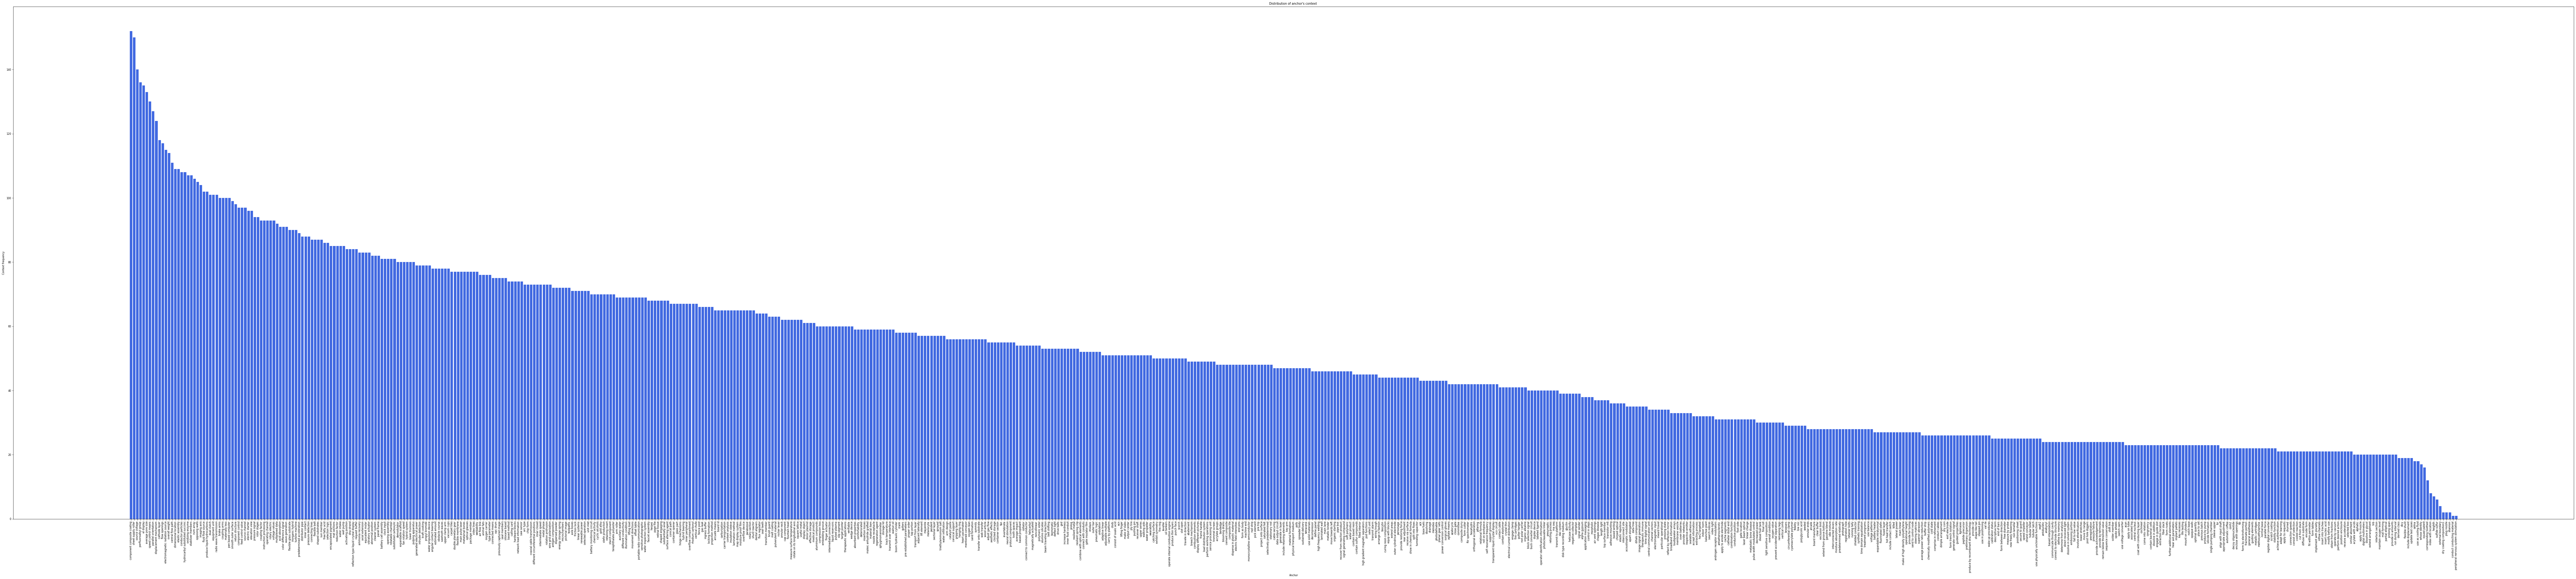

In [121]:
plt.rcParams.update({'font.size': 8})   

n = len(data.keys())
plt.figure(figsize=(n//5, 30))
plt.bar(data.keys(), data.values(), align='center', color='royalblue')
plt.xlabel('Anchor')
plt.ylabel('Context frequency')
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

plt.title('Distribution of anchor\'s context ')

In [122]:
df['anchor'].unique().shape

(733,)

Statistics on anchor given the context

In [124]:
df['context'].unique().shape

(106,)

Text(0.5, 1.0, "Distribution of context's anchor")

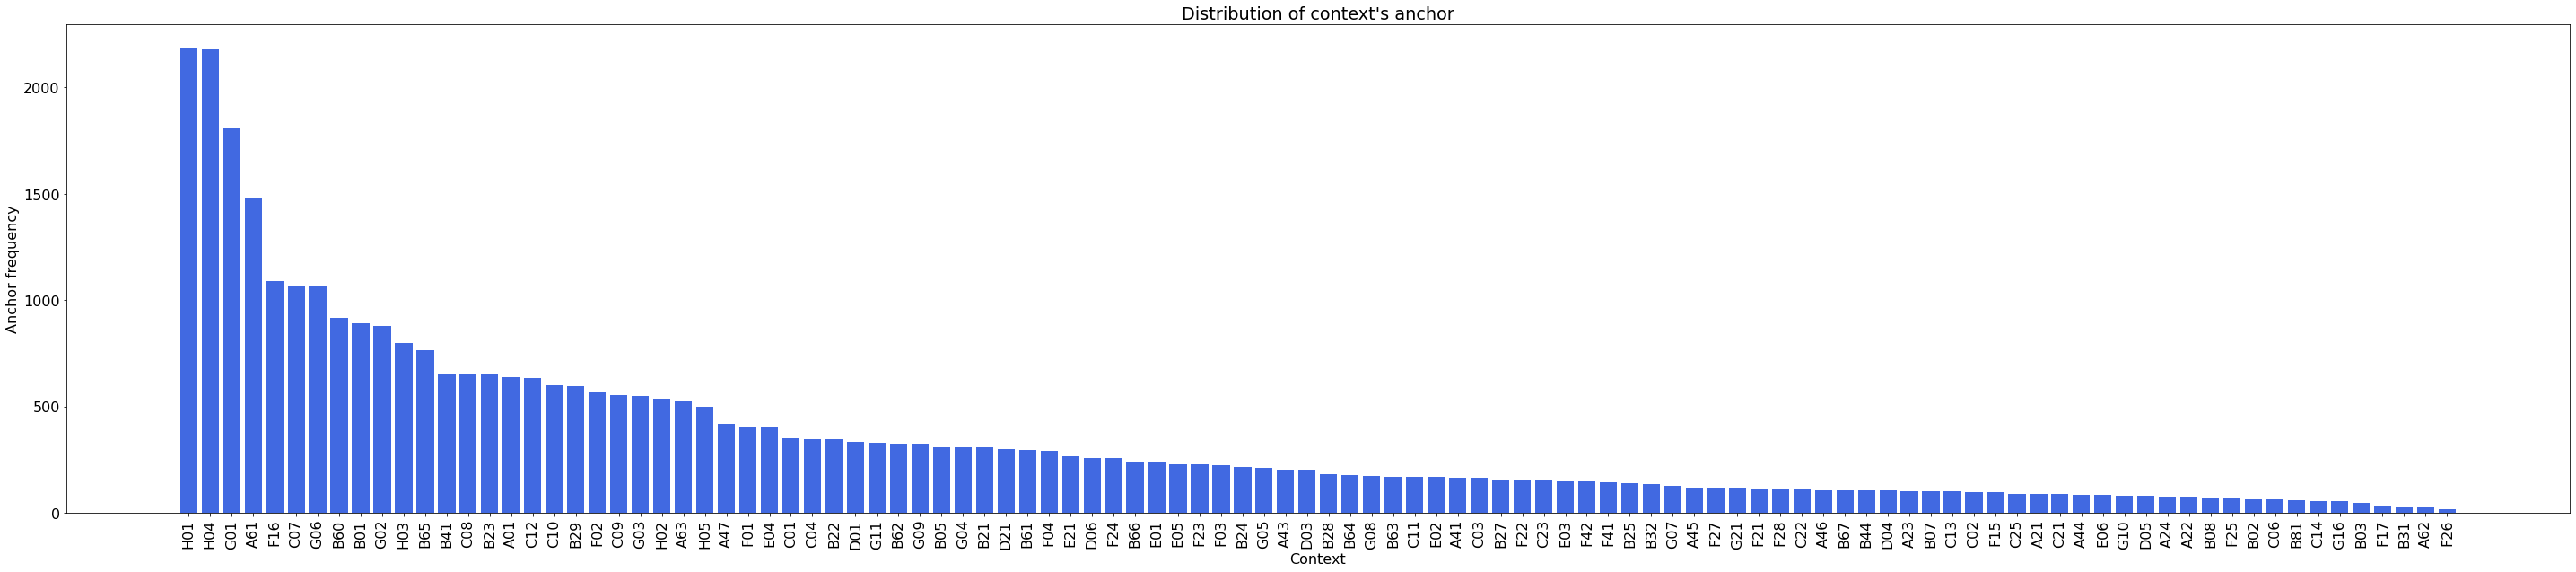

In [133]:
df_context = df.groupby('context')['anchor'].count()
tmp = df_context.to_dict()
data = dict(sorted(tmp.items(), key=lambda item: item[1], reverse=True))
plt.rcParams.update({'font.size': 16})   

n = len(data.keys())
plt.figure(figsize=(50, 10))
plt.bar(data.keys(), data.values(), align='center', color='royalblue')
plt.xlabel('Context')
plt.ylabel('Anchor frequency')
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

plt.title('Distribution of context\'s anchor')